##Emotions Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/facial-recognition-dataset.zip"

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
batch_size = 124
img_height = 124
img_width = 124

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/Training/Training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28273 files belonging to 6 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/Testing/Testing",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7067 files belonging to 6 classes.


In [5]:
class_names = train_ds.class_names
num_classes =len(class_names)
print(class_names)

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']


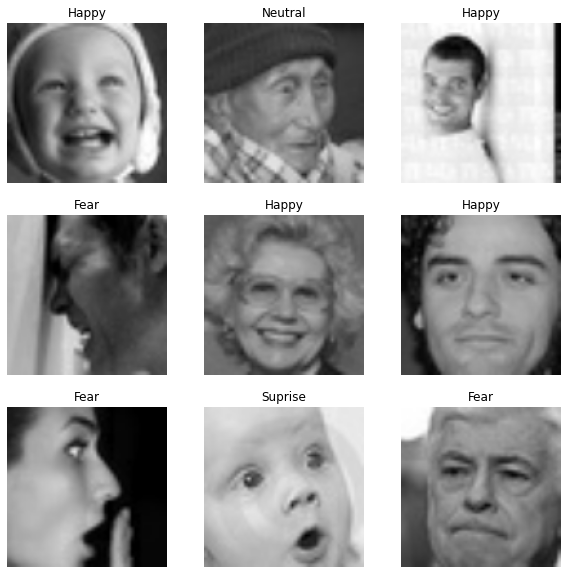

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [9]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 124, 124, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 124, 124, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 64)       

In [12]:
checkpoint = ModelCheckpoint("model_emotions.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [13]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks,
)

Epoch 1/50
229/229 [==============================] - 36s 60ms/step - loss: 1.7645 - accuracy: 0.2578 - val_loss: 1.6320 - val_accuracy: 0.3369

Epoch 00001: val_loss improved from inf to 1.63204, saving model to model_emotions.h5
Epoch 2/50
229/229 [==============================] - 10s 44ms/step - loss: 1.6281 - accuracy: 0.3334 - val_loss: 1.4863 - val_accuracy: 0.4118

Epoch 00002: val_loss improved from 1.63204 to 1.48632, saving model to model_emotions.h5
Epoch 3/50
229/229 [==============================] - 10s 44ms/step - loss: 1.5143 - accuracy: 0.3999 - val_loss: 1.3604 - val_accuracy: 0.4568

Epoch 00003: val_loss improved from 1.48632 to 1.36040, saving model to model_emotions.h5
Epoch 4/50
229/229 [==============================] - 10s 44ms/step - loss: 1.3906 - accuracy: 0.4477 - val_loss: 1.3001 - val_accuracy: 0.4957

Epoch 00004: val_loss improved from 1.36040 to 1.30006, saving model to model_emotions.h5
Epoch 5/50
229/229 [==============================] - 10s 44ms/s

In [14]:
!cp "/content/model_emotions.h5" "/content/drive/MyDrive"